In [5]:
#17
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import PowerTransformer
# 加载糖尿病数据集
diabetes_data = load_diabetes()
# 创建 DataFrame，使用数据和特征名称
df = pd.DataFrame(data=diabetes_data.data, columns=diabetes_data.feature_names)
# 选择要归一化的特征名称
feature_name = 'bmi'
# 初始化 Yeo-Johnson 转换器
yeo_johnson_transformer = PowerTransformer(method='yeo-johnson')

# 对选定特征进行归一化
df_transformed = df.copy()  # 复制 DataFrame 以保留原始数据
df_transformed[feature_name] = yeo_johnson_transformer.fit_transform(df[[feature_name]])
# 打印转换后的结果
print(df_transformed.head())


        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  1.272058  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -1.159100 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.984937 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.139725 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.749303  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019907 -0.017646  
1 -0.039493 -0.068332 -0.092204  
2 -0.002592  0.002861 -0.025930  
3  0.034309  0.022688 -0.009362  
4 -0.002592 -0.031988 -0.046641  


In [6]:
# 查看转换后特征的统计摘要
print(df_transformed[[feature_name]].describe())

                bmi
count  4.420000e+02
mean  -2.411344e-17
std    1.001133e+00
min   -2.362399e+00
25%   -6.932270e-01
50%   -4.131995e-02
75%    7.479512e-01
max    2.630623e+00


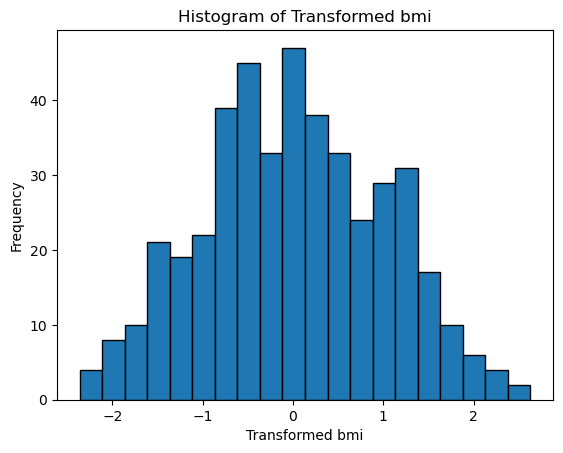

In [7]:
from sklearn.preprocessing import PowerTransformer

# 选择要转换的特征
feature_name = 'bmi'

# 初始化 Yeo-Johnson 转换器
yeo_johnson_transformer = PowerTransformer(method='yeo-johnson')

# 对特定特征进行转换
df_transformed = df.copy()  # 复制 DataFrame 以保留原始数据
df_transformed[feature_name] = yeo_johnson_transformer.fit_transform(df[[feature_name]])
import matplotlib.pyplot as plt

# 绘制转换后特征的直方图
plt.hist(df_transformed[feature_name], bins=20, edgecolor='black')
plt.xlabel('Transformed ' + feature_name)
plt.ylabel('Frequency')
plt.title('Histogram of Transformed ' + feature_name)
plt.show()

In [8]:
#37
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.feature_selection import SelectPercentile, mutual_info_regression
np.random.seed(0)  # 设置随机种子

# 加载糖尿病数据集
diabetes_data = load_diabetes()
X = diabetes_data.data  # 特征矩阵
y = diabetes_data.target  # 目标变量
feature_names = diabetes_data.feature_names  # 特征名称
# 计算特征与目标变量之间的互信息
mutual_info = mutual_info_regression(X, y)
# 选择 5% 最佳特征
percentile = 5
num_features = int(len(feature_names) * percentile / 100)

selector = SelectPercentile(mutual_info_regression, percentile=percentile)
selector.fit(X, y)

# 获取选定特征的索引
selected_features_indices = selector.get_support(indices=True)

# 获取选定特征的名称
selected_features = [feature_names[i] for i in selected_features_indices]
# 输出特征选择结果
print(f"Выбранные признаки ({percentile}% лучших):")
for feature, mi_score in zip(selected_features, selector.scores_[selected_features_indices]):
    print(f"{feature}: {mi_score:.3f}")


Выбранные признаки (5% лучших):
bmi: 0.175


D:\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


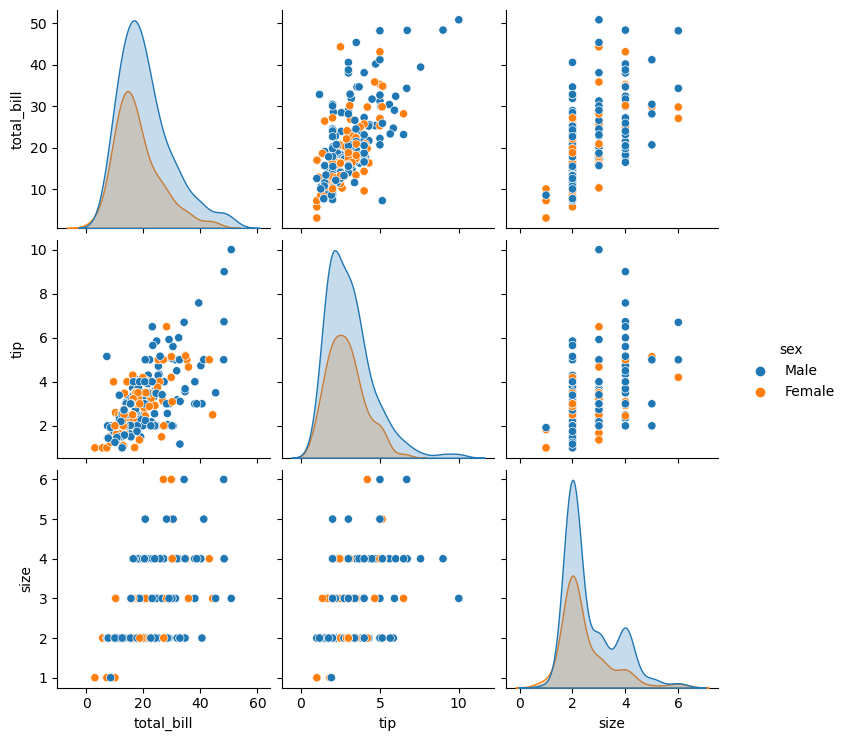

In [9]:
# дополнительная задача
import seaborn
import matplotlib.pyplot as plt

df = seaborn.load_dataset('tips')
seaborn.pairplot(df, hue ='sex')
plt.show()
